Putting a sticker on My picture!
=
[in Korean](#내-사진에-스티커-붙이기)
# Contents 
## 1. How to try it
## 2. What is sticker.py
1. Destination and Significance
2. Code evaluation


----
내 사진에 스티커 붙이기!
=
# 목차
## 1. 파일 이용 방법   
## 2. sticker.py에 대하여  
1. [도전 목표 및 의의](#1-도전-목표-및-의의)
2. [코드 해석](#2-코드-해석)
3. [완벽한가?](#3-완벽한가)

----
# 1. 파일 이용 방법
### 1. Working/AI/sticker_img 파일을 전부 다운로드한다.
### 2. 스티커를 붙일 이미지 파일을 Working/AI/sticker_img/images폴더에 위치시킨다.
### 3. 스티커로 사용할 이미지 파일을 Working/AI/sticker_img/sticker폴더에 위치시킨다.
### 4. python3 sticker.py를 실행한다.
이렇게 이용해볼 수 있어요!
![이미지](data/my_program.png)

----
# 2. sticker.py에 대하여   
## 1. 도전 목표 및 의의
### 사진에 OpenCV2 라이브러리를 이용하여, 이미지에 스티커 붙이기 작업을 해보겠습니다. OpenCV를 처음 써보는 만큼 많이 배워가길 기대해봅니다. 또 dlib라이브러리와 인공지능 모델을 활용한, 얼굴인식 기능을 사용해보도록 하겠습니다. 누군가 만든 기능이지만, 사용하는 것조차 쉽지 않을 것 같은 예감이 드는군요.

## 2. 코드 해석

### 먼저 코드를 보시기 전에, 위 순서를 따라 파일을 재미있게 사용해보시길 권해드립니다:) 그러면 필요한 라이브리러를 호출하겠습니다. 

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
print("🌫🛸")
import os
import re

🌫🛸


### 다음으로는 본 파일을 여러곳에서 동일하게 테스트 할 수 있도록 경로설정을 하겠습니다. 이렇게 함으로, 만드는 것에 더 의미도 있고, 재미도 있고, 공유하기도 용이해집니다!

In [3]:
Workingpath = input("\n\n\n\n\n사용자의 home 디렉토리에서 Working파일 사이의 경로를 입력하세요.\
    \n(ex: /aiffel/assignment   ,  Working파일이 Home 디렉토리에 있다면, 그냥 Enter를 누르세요.) :")
image_path = os.getenv('HOME')+Workingpath+'/Working/AI/sticker_img/images/'
sticker_path = os.getenv('HOME')+Workingpath+'/Working/AI/sticker_img/sticker/'
image_list = os.listdir(image_path)
sticker_list = os.listdir(sticker_path)

사용자의 home 디렉토리에서 Working파일 사이의 경로를 입력하세요.    
(ex: /aiffel/assignment   ,  Working파일이 Home 디렉토리에 있다면, 그냥 Enter를 누르세요.) :    
### 다음으로는 사용할 함수들을 정의하겠습니다. 사실 처음부터 이렇게 정의한 것은 없고, 만들다가 어쩔 수 없이 필요한 것만 썼습니다. 아직 함수를 유용하게 쓰기가 익숙하지 않군요.

In [4]:
# 사진 고르기 함수
def select_img(image_list):
    n=0
    while n==0 :
        print("어느 사진에 스티커를 붙이시겠습니까?\n")
        num=1

        for i in image_list:
            print(str(num)+'번:', i)
            num += 1    

        try:
            a = input("사진에 해당하는 번호를 입력하세요(추천사진 3번ㅋㅋ):")
            b = int(a[:re.search('[0-9]+',a).end()])

        except:
            print('\n\n\n\n숫자를 골라주세요!\n\n\n\n\n')
            continue
        n=1

    return b
# 스티커 고르기 함수
def select_stk(image_list):
    n=0
    while n==0 :
        print("어느 스티커를 붙일까요?\n")
        num=1

        for i in image_list:
            print(str(num)+'번:', i)
            num += 1    

        try:
            a = input("스티커의 번호를 입력해주세요.:")
            b = int(a[:re.search('[0-9]+',a).end()])

        except:
            print('\n\n\n\n숫자를 골라주세요!\n\n\n\n\n')
            continue
        n=1

    return b


### 아래는 스티커를 회전시키는 함수입니다. 인터넷을 찾다가 발견했습니다.
[here](https://ansan-survivor.tistory.com/641)

In [5]:
# 회전함수
def im_rotate(img, degree):
    h, w = img.shape[:-1]
    # crossLine = int(((w * h + h * w) ** 0.5))
    centerRotatePT = int(w / 2), int(h / 2)
    new_h, new_w = h, w 
    rotatefigure = cv2.getRotationMatrix2D(centerRotatePT, degree, 1) 
    result = cv2.warpAffine(img, rotatefigure, (new_w, new_h)) 
    return result



### 회전시키고 싶은 사진의 중앙값을 계산에서 회전시키는 함수에 대입하도록 만들었어요. 회전은 나중에 생각할 것이므로 뒤에서 설명해보도록 하겠습니다!

### 이제 여러가지 사진을 쉽게 적용해볼 수 있도록 위에 정의한 함수를 사용하여 프로그램을 구축했습니다. while문을 돌면서 선택한 사진을 보여주고, 마음에 드는 사진일 시에만 다음으로 넘어가도록 만들었습니다.

어느 사진에 스티커를 붙이시겠습니까?

1번: sis.JPG
2번: image02.png
3번: injam.JPG
4번: me.JPG
5번: itsme2.jpg
6번: itsme.jpg
7번: image01.png
8번: cha.png


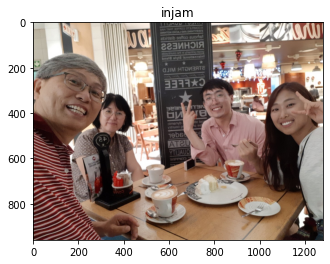

In [6]:
n=0
while n==0:
    num = select_img(image_list)
    image_name = image_list[num-1]
    img_bgr = cv2.imread(image_path + image_name)
    img_show = img_bgr.copy()
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)    
    plt.imshow(img_rgb)
    only_imagename = os.path.splitext(image_name)[0]
    plt.title(only_imagename)
    plt.show()
    end=input("이 사진으로 하시겠어요? (y/n)\n\n:")
    if end == 'y' or end == 'yes' or end == 'Y':
        n=1


### 다음으로는 사용할 함수들을 정의하겠습니다. 사실 처음부터 이렇게 정의한 것은 없고, 만들다가 어쩔 수 없이 필요한 것만 썼습니다. 아직 함수를 유용하게 쓰기가 익숙하지 않군요.

In [7]:
import dlib
detector_hog = dlib.get_frontal_face_detector()  

dlib_rects = detector_hog(img_rgb, 0)
print("얼굴 위치 발견! → ",dlib_rects)


얼굴 위치 발견! →  rectangles[[(1010, 313) (1189, 492)], [(742, 286) (867, 411)], [(113, 233) (328, 448)], [(286, 369) (411, 494)]]


얼굴이 여기 있군요!


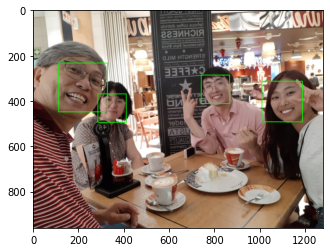

In [8]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    cv2.rectangle(img_rgb, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    plt.imshow(img_rgb)

print("얼굴이 여기 있군요!")
plt.show()


In [9]:
model_path = os.getenv('HOME') + Workingpath + '/Working/AI/sticker_img/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸\n🌫🛸\n🌫🛸")

🌫🛸
🌫🛸
🌫🛸


In [10]:
list_landmarks = []
# print(type(dlib_rects))
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print("얼굴 각 정해진 위치를 찾아볼게요. 각각 68개 씩",str(len(list_landmarks[0])*len(list_landmarks))+"개의 점을 찍었어요!")


얼굴 각 정해진 위치를 찾아볼게요. 각각 68개 씩 272개의 점을 찍었어요!


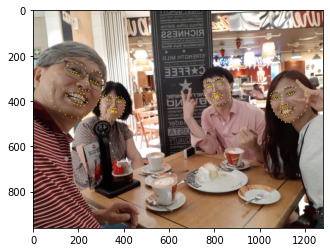

In [11]:
for landmark in list_landmarks:  # landmark == list_points
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB,)
plt.imshow(img_show_rgb)
plt.show()


### 스티커는 2번 고양이 수염으로 골랐어요. 그런데..! 사진 파일로 볼때는 배경은 투명해서 합치면 자연스레 얼굴에 씌워질 것 같았는데, 그렇지 않다는 걸 쉽게 배울 수 있었습니다.(그냥 되는게 없어요^^)
### print(stk_rgb)로 스티커의 정보를 보니, 빈 칸이 없이, 다 차있습니다. 당연한 걸까요? 후에 마스킹을 해주는 함수로 조정을 해줄거지만 더 편한 방법이 있을거라는 생각이 듭니다.

### 당장은 스티커를 어디에 붙일지 정하는 것 부터가 아주 큰 일입니다.

이제 스티커를 골라봅시다.
어느 스티커를 붙일까요?

1번: hero.png
2번: cat-whiskers.png
3번: king.png


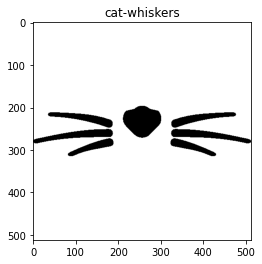

(1100, 415)
(x,y) : (1100,415)
(w,h) : (180,180)
(180, 180, 3)
(x,y) : (1010,341)
여기에 씌우겠습니다.


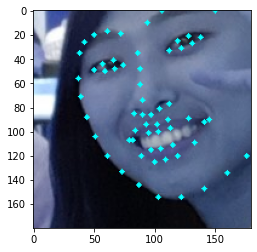

(800, 357)
(x,y) : (800,357)
(w,h) : (126,126)
(126, 126, 3)
(x,y) : (737,308)
여기에 씌우겠습니다.


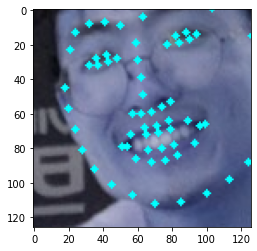

(235, 327)
(x,y) : (235,327)
(w,h) : (216,216)
(216, 216, 3)
(x,y) : (127,252)
여기에 씌우겠습니다.


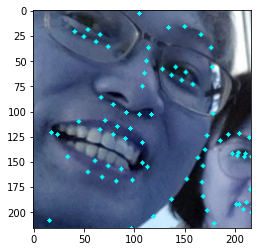

(356, 423)
(x,y) : (356,423)
(w,h) : (126,126)
(126, 126, 3)
(x,y) : (293,376)
여기에 씌우겠습니다.


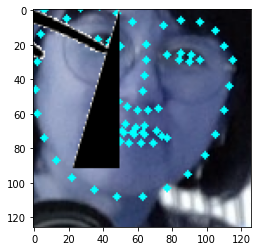

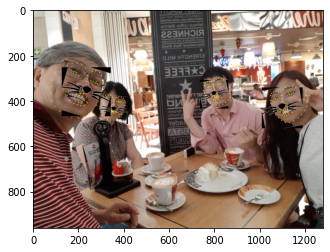

In [12]:
# 스티커 고르기
print("이제 스티커를 골라봅시다.")
while n==1:
    num = select_stk(sticker_list)
    sticker_name = sticker_list[num-1]
    stk_bgr = cv2.imread(sticker_path + sticker_name)
    stk_rgb = cv2.cvtColor(stk_bgr, cv2.COLOR_BGR2RGB)    
    plt.imshow(stk_rgb)
    only_stikername = os.path.splitext(sticker_name)[0]
    plt.title(only_stikername)
    plt.show()
    end=input("이 스티커가 괜찮나요? (y/n)\n\n:")
    if end == 'y' or end == 'yes' or end == 'Y':
        n=2

# 스티커 붙일 자리 찾기
c,d= (0,0),(0,0)
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    a = landmark[33][1]
    b = landmark[51][1]
    c = landmark[2]
    d = landmark[14]
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

    img_sticker = cv2.imread(sticker_path + sticker_name)
    # 사이즈 조절
    img_sticker = cv2.resize(img_sticker, (h,w))
    # print (img_sticker.shape)
    # 회전
    s=np.array(d)-np.array(c)
    se=np.arctan(s[1]/s[0])*(180/np.pi)
    img_sticker = im_rotate(img_sticker,-se)




    y_offset = (a + b)//2

    refined_x = x - w // 2  # left
    refined_y = y_offset - h // 2  # top
    # print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

    # print(type(refined_y))
    # print(refined_y)



    # print(refined_y)

    # 넘치는 스티커는 자른다.
    if refined_y <0 :
        img_sticker = img_sticker[-refined_y:]
    print (img_sticker.shape)
    
    print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

    # 스티커 붙이는 식

    sticker_area = img_show[refined_y:h + refined_y, refined_x:refined_x + w]

    print("여기에 씌우겠습니다.")
    plt.imshow(sticker_area)
    plt.show()

    img_show[refined_y:h + refined_y, refined_x:refined_x + w] = \
        np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)


plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()


### AIFFEL에서 초기 식을 제공해주지만, 아주 많은 시행착오와, 나융님, 성연님 등의 도움으로 적절한 식을 도출해낼 수 있었습니다. 이렇게 단순한게 아닌데, 지금까지 어플들에서 당연하다는 듯이 쓰고 있었다는 걸 깨닫게 되는 군요.
### 위의   
```python
    s=np.array(d)-np.array(c)
    se=np.arctan(s[1]/s[0])*(180/np.pi)
    img_sticker = im_rotate(img_sticker,-se)
```   
이 식으로 고양이 수염의 회전까지 완벽하게 나타냈습니다.

![이미지](data/first.png)

### 나오는 출력을 보니, 회전시키고 빈 공간을 검은색으로 칠해줄 줄이야. 어떻게 생각하면 합리적인 판단이라고 할 수 있겠습니다. 

### 바로 아래 있는 코드가 제가 생각하는 가장 좋은 정답이고, 그 아래에는 제가 한 시행착오들이 남겨져 있습니다.

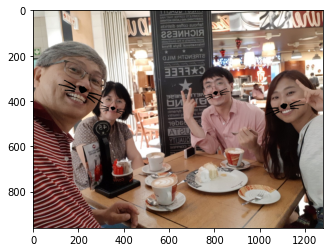

In [13]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    a = landmark[33][1]
    b = landmark[51][1]
    c = landmark[2]
    d = landmark[14]
    # print ('(x,y) : (%d,%d)'%(x,y))
    # print ('(w,h) : (%d,%d)'%(w,h))
    s=np.array(d)-np.array(c)
    se=np.arctan(s[1]/s[0])*(180/np.pi)*1.4
    y_offset = (a + b)//2

    refined_x = x - w // 2  - s[1]//3 # left
    refined_y = y_offset - h // 2  # top

    img_sticker = cv2.imread(sticker_path + sticker_name)
    img_sticker = cv2.resize(img_sticker, (h,w))


    # 이녀석 특성상 색을 반전시킨다.
    img_sticker = np.where(img_sticker==255, 0, 255).astype(np.uint8)

    img_sticker = im_rotate(img_sticker,-se)
    #다시 반전
    img_sticker = np.where(img_sticker==255, 0, 255).astype(np.uint8)

    if refined_y <0 :
        img_sticker = img_sticker[-refined_y:]
    # print (img_sticker.shape)

    sticker_area = img_bgr[refined_y:refined_y + h, refined_x:refined_x + w]
    img_bgr[refined_y:h + refined_y, refined_x:refined_x + w] = \
        np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()


# 3. 완벽한가?

아니, 당연히 완벽하지 않죠. 오히려 지금 당장 보이는 문제점들이 너무 많습니다. 하지만 더 나은 앞으로를 위해 정리해봅시다.
## 내가 생각한 아쉬움
### 1. 스티커마다 위치를 사용자가 고려하여, 변수를 수정해주어야 한다.
### 2. 충분히 멀쩡한 얼굴을 인식하지 못하는 경우가 있다. (8번 케이스)
### 3. 더, 깊게 공부하고 싶은데, 정말 시간이 너무 모자라다.

![마지막](data/last.png)
